In [3]:
#Basic and most important libraries
import pandas as pd
import numpy as np
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from collections import Counter
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import plotly

In [7]:
#Classifiers
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier, RandomForestClassifier 
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import plot_importance
from xgboost import XGBClassifier

In [9]:
#Model evaluation tools
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import cross_val_score

In [10]:
#Data processing functions
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

import warnings
warnings.filterwarnings("ignore")

In [22]:
data = pd.read_csv("loan_prediction.csv")
data.sample(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
348,LP002137,Male,Yes,0,Graduate,No,6333,4583.0,259.0,360.0,NaN,Semiurban,Y
405,LP002305,Female,No,0,Graduate,No,4547,0.0,115.0,360.0,1.0,Semiurban,Y
599,LP002948,Male,Yes,2,Graduate,No,5780,0.0,192.0,360.0,1.0,Urban,Y
555,LP002792,Male,Yes,1,Graduate,No,5468,1032.0,26.0,360.0,1.0,Semiurban,Y
598,LP002945,Male,Yes,0,Graduate,Yes,9963,0.0,180.0,360.0,1.0,Rural,Y


In [23]:
data.shape

(614, 13)

In [26]:
categorical_columns = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Credit_History','Loan_Amount_Term']

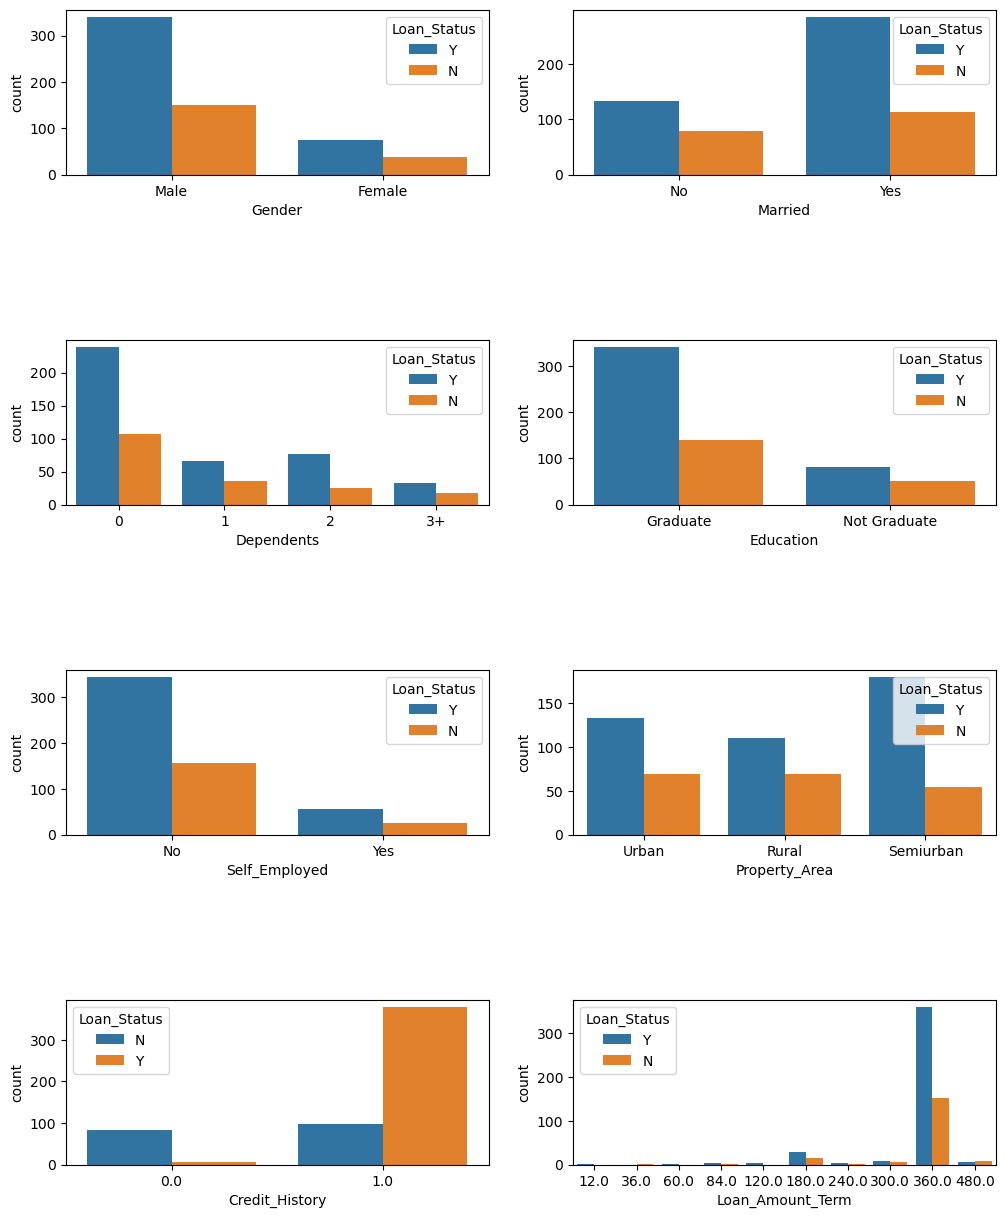

In [27]:
#Data Visualisation 

fig,axes = plt.subplots(4,2,figsize=(12,15))
for idx, cat_col in enumerate(categorical_columns):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=data,hue='Loan_Status', ax=axes[row,col])

plt.subplots_adjust(hspace=1)

Plots above convey few things about dataset
1. About 2/3rd of applicants have been granted load
2. Men are more than women (approx. 3x)
3. 2/3rd of the population in the dataset is married
4. majority of te population hace zero dependents and are also likely to be accepted for loan
5. About 5/6th of the population is graduate and have higher probability of getting loan
6. 5/6th of population is not self employed
7. more applicants are from semi-urban and also likely to be granted loans
8. applicants with credit history are far more likely to get the loan
   

In [32]:
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

       ApplicantIncome  CoapplicantIncome  LoanAmount
count       614.000000         614.000000  592.000000
mean       5403.459283        1621.245798  146.412162
std        6109.041673        2926.248369   85.587325
min         150.000000           0.000000    9.000000
25%        2877.500000           0.000000  100.000000
50%        3812.500000        1188.500000  128.000000
75%        5795.000000        2297.250000  168.000000
max       81000.000000       41667.000000  700.000000


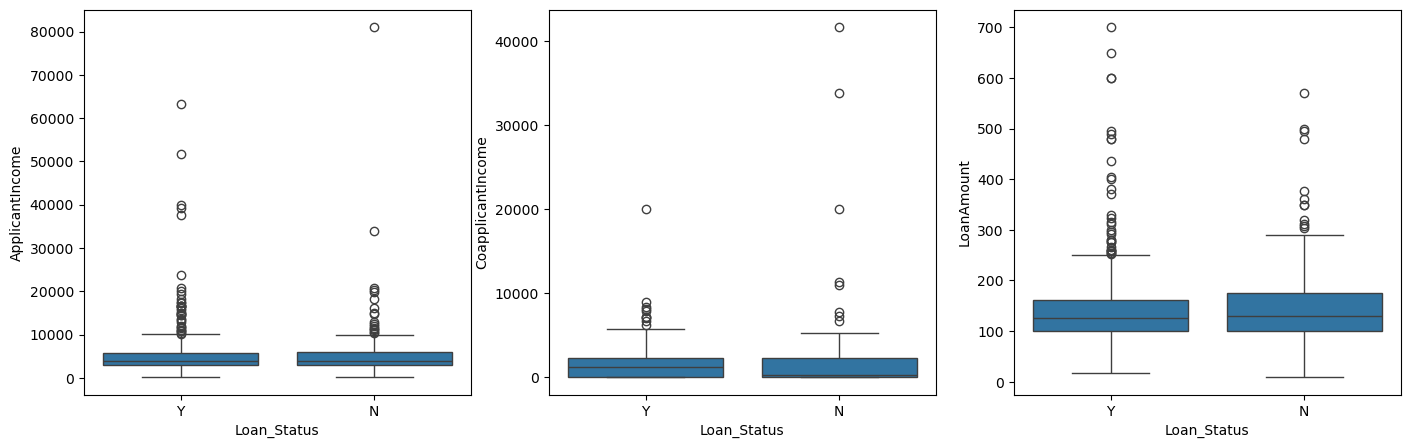

In [34]:
fig,axes = plt.subplots(1,3,figsize=(17,5))
for idx,cat_col in enumerate(numerical_columns):
    sns.boxplot(y=cat_col,data=data,x='Loan_Status', ax=axes[idx])

print(data[numerical_columns].describe())
plt.subplots_adjust(hspace=1)

For Numerical Columns, there is no significant relation to Loan approval status

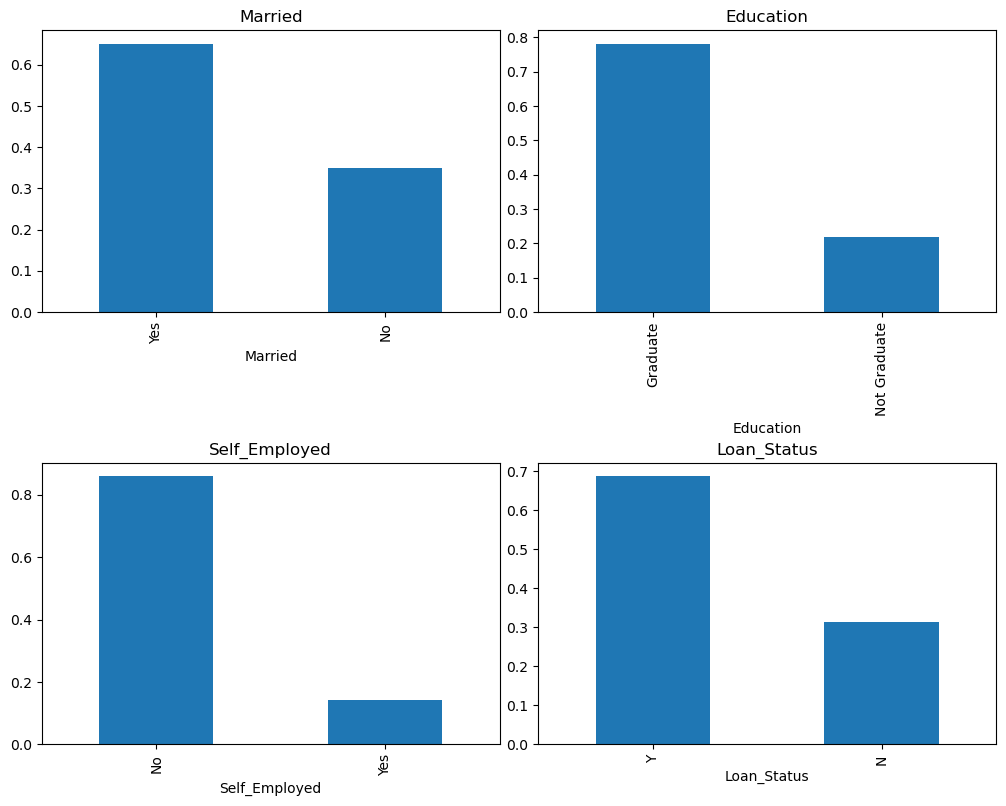

In [36]:
plt.subplot(221)
data.Married.value_counts(normalize=True).plot(kind='bar', title='Married', figsize=(10,8))
plt.tight_layout(pad=0.5)
plt.subplot(222)
data.Education.value_counts(normalize=True).plot(kind='bar', title='Education')
plt.tight_layout(pad=0.5)
plt.subplot(223)
data.Self_Employed.value_counts(normalize=True).plot(kind='bar', title='Self_Employed')
plt.tight_layout(pad=0.5)
plt.subplot(224)
data.Loan_Status.value_counts(normalize=True).plot(kind='bar', title='Loan_Status')
plt.tight_layout(pad=0.5)

1. 80% of load applicants are male in the training dataset
2. Nearly 70% are married
3. About 75% of loan applicants are graduate
4. 85-90% are self-employed
5. Loan approved for 65% of applicants


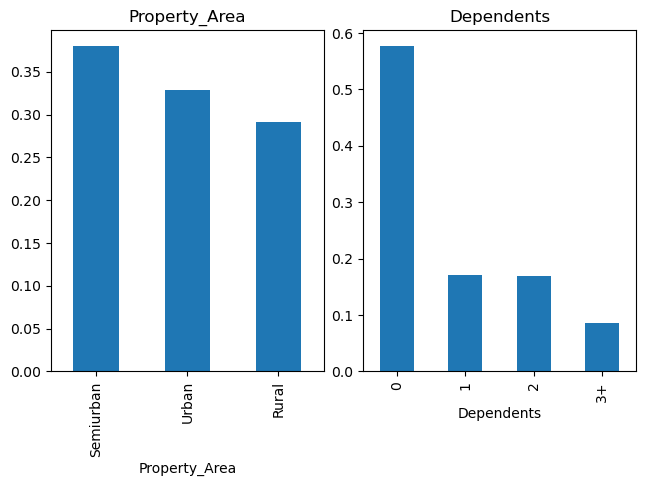

In [37]:
plt.subplot(121)
data.Property_Area.value_counts(normalize=True).plot(kind='bar', title='Property_Area')
plt.tight_layout(pad=0.5)
plt.subplot(122)
data.Dependents.value_counts(normalize=True).plot(kind='bar', title='Dependents')
plt.tight_layout(pad=0.5)

1. About 58% have no dependents
2. Highest number of applicants are from semi urbam aread followed by urban areas

<Axes: xlabel='Property_Area', ylabel='count'>

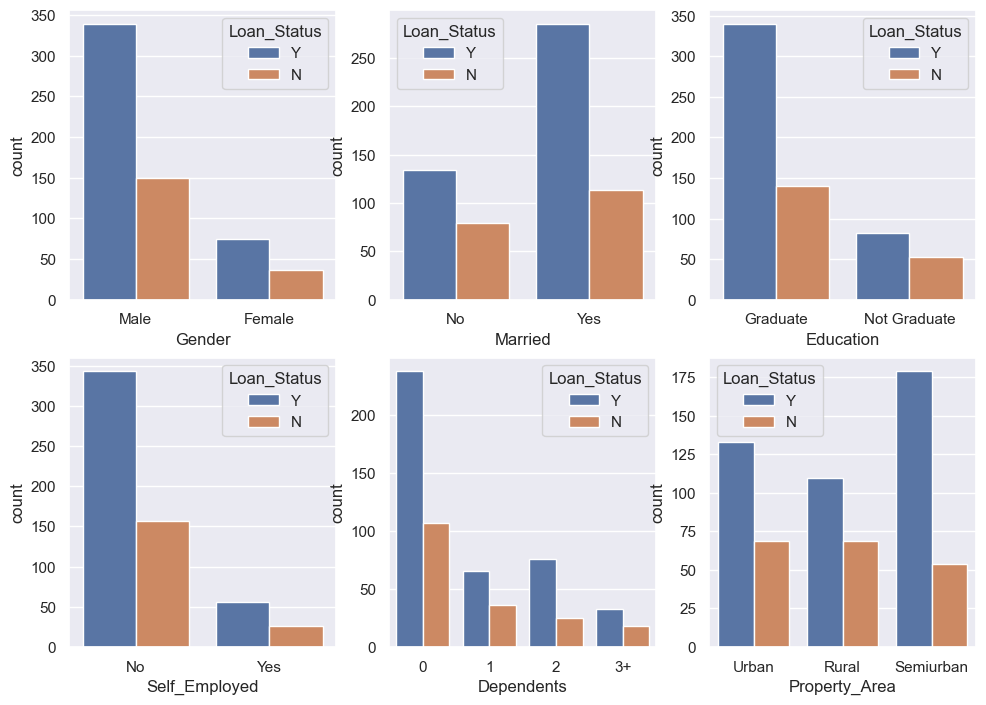

In [39]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.subplot(231)
sns.countplot(x='Gender', hue='Loan_Status', data=data)
plt.subplot(232)
sns.countplot(x='Married', hue='Loan_Status', data=data)
plt.subplot(233)
sns.countplot(x='Education', hue='Loan_Status', data=data)
plt.subplot(234)
sns.countplot(x='Self_Employed', hue='Loan_Status', data=data)
plt.subplot(235)
sns.countplot(x='Dependents', hue='Loan_Status', data=data)
plt.subplot(236)
sns.countplot(x='Property_Area', hue='Loan_Status', data=data)

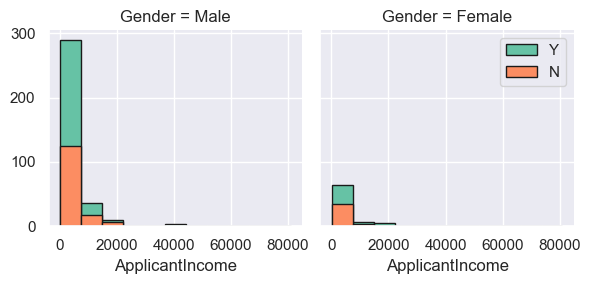

In [40]:
bins = np.linspace(data.ApplicantIncome.min(), data.ApplicantIncome.max(),12)
graph = sns.FacetGrid(data, col='Gender', hue='Loan_Status', palette='Set2', col_wrap=2)
graph.map(plt.hist, 'ApplicantIncome', bins=bins,ec='k')
graph.axes[-1].legend()
plt.show()

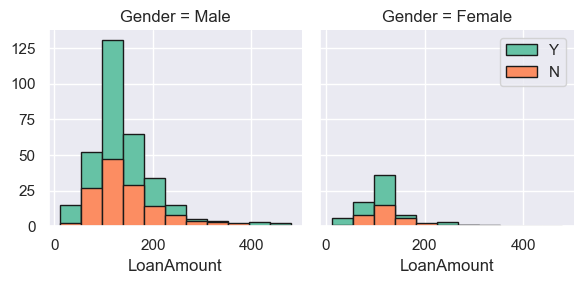

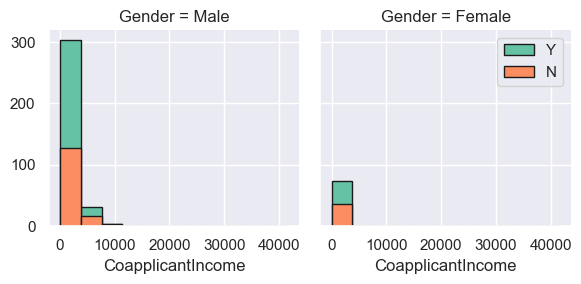

In [42]:
bins = np.linspace(data.Loan_Amount_Term.min(), data.Loan_Amount_Term.max(),12)
graph = sns.FacetGrid(data, col='Gender', hue='Loan_Status', palette='Set2', col_wrap=2)
graph.map(plt.hist, 'LoanAmount', bins=bins,ec='k')
graph.axes[-1].legend()
plt.show()
bins = np.linspace(data.CoapplicantIncome.min(), data.CoapplicantIncome.max(),12)
graph = sns.FacetGrid(data, col='Gender', hue='Loan_Status', palette='Set2', col_wrap=2)
graph.map(plt.hist, 'CoapplicantIncome', bins=bins,ec='k')
graph.axes[-1].legend()
plt.show()

Females with income higher than 7000 has higher chances of loan approval
Females seems to load lesser amount than men
